In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
avo_df = pd.read_csv('avocado.csv')

In [3]:
avo_df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
avo_df.shape

(18249, 14)

In [6]:
avo_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

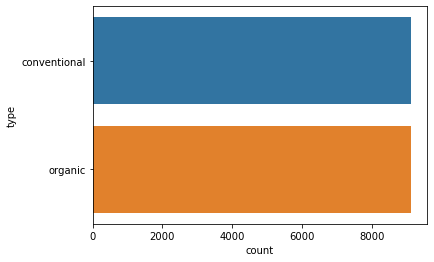

In [8]:
sns.countplot(y=avo_df.type)
# the type variable is not bais

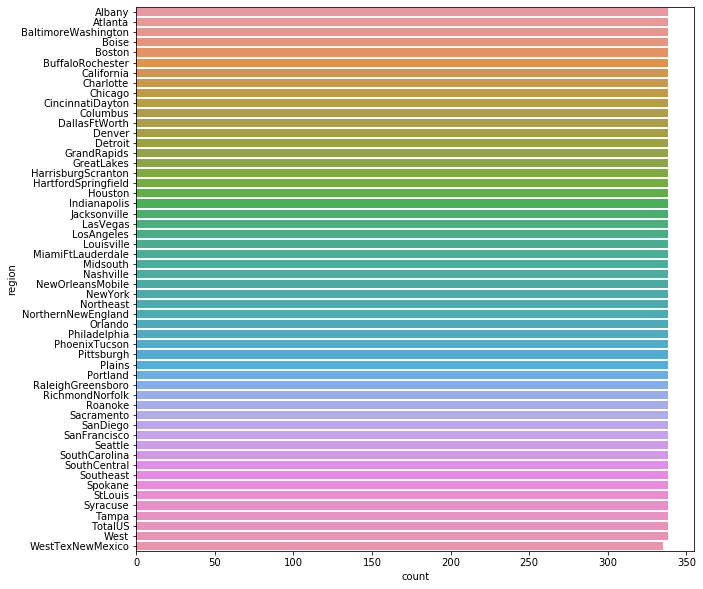

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(y=avo_df.region)
# the region variable is not bais

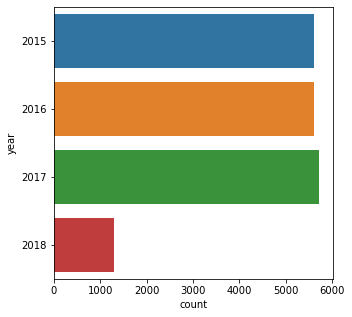

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(y=avo_df.year)

In [14]:
avo_df = avo_df.sort_values("Date")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


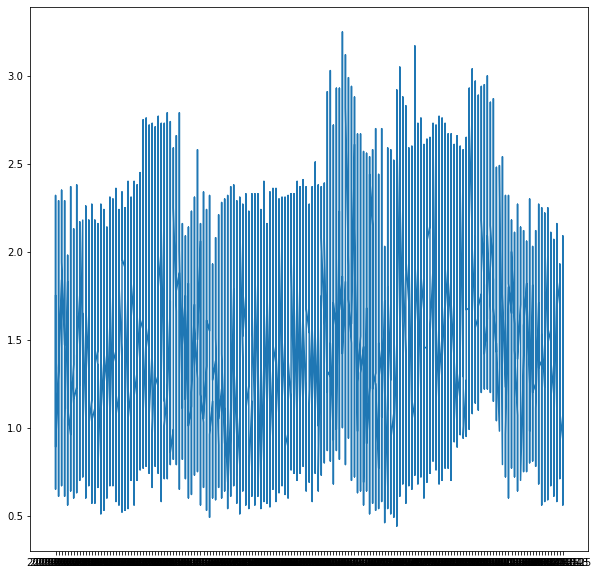

In [16]:
plt.figure(figsize=(10,10))
plt.plot(avo_df['Date'], avo_df['AveragePrice'])

In [19]:
avo_df.corr()

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.133008      0.014035  0.017628  0.019829   
AveragePrice   -0.133008      1.000000     -0.192752 -0.208317 -0.172928   
Total Volume    0.014035     -0.192752      1.000000  0.977863  0.974181   
4046            0.017628     -0.208317      0.977863  1.000000  0.926110   
4225            0.019829     -0.172928      0.974181  0.926110  1.000000   
4770            0.041752     -0.179446      0.872202  0.833389  0.887855   
Total Bags     -0.002219     -0.177088      0.963047  0.920057  0.905787   
Small Bags      0.000347     -0.174730      0.967238  0.925280  0.916031   
Large Bags     -0.009196     -0.172940      0.880640  0.838645  0.810015   
XLarge Bags    -0.011546     -0.117592      0.747157  0.699377  0.688809   
year           -0.171667      0.093197      0.017193  0.003353 -0.009559   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.041752   -0.002219    0.000347   -0.009196    -0.011546   
AveragePrice -0.179446   -0.177088   -0.174730   -0.172940    -0.117592   
Total Volume  0.872202    0.963047    0.967238    0.880640     0.747157   
4046          0.833389    0.920057    0.925280    0.838645     0.699377   
4225          0.887855    0.905787    0.916031    0.810015     0.688809   
4770          1.000000    0.792314    0.802733    0.698471     0.679861   
Total Bags    0.792314    1.000000    0.994335    0.943009     0.804233   
Small Bags    0.802733    0.994335    1.000000    0.902589     0.806845   
Large Bags    0.698471    0.943009    0.902589    1.000000     0.710858   
XLarge Bags   0.679861    0.804233    0.806845    0.710858     1.000000   
year         -0.036531    0.071552    0.063915    0.087891     0.081033   

                  year  
Unnamed: 0   -0.171667  
AveragePrice  0.093197  
Total Volume  0.017193  
4046          0.003353  
4225         -0.009559  
4770         -0.036531  
Total Bags    0.071552  
Small Bags    0.063915  
Large Bags    0.087891  
XLarge Bags   0.081033  
year          1.000000

In [20]:
avo_prof_df=avo_df[['Date','AveragePrice']]

In [22]:
avo_prof_df.head()

Date  AveragePrice
11569  2015-01-04          1.75
9593   2015-01-04          1.49
10009  2015-01-04          1.68
1819   2015-01-04          1.52
9333   2015-01-04          1.64

In [23]:
avo_prof_df=avo_prof_df.rename(columns={'Date':'ds','AveragePrice':'y'})

In [24]:
avo_prof_df

ds     y
11569  2015-01-04  1.75
9593   2015-01-04  1.49
10009  2015-01-04  1.68
1819   2015-01-04  1.52
9333   2015-01-04  1.64
...           ...   ...
8574   2018-03-25  1.36
9018   2018-03-25  0.70
18141  2018-03-25  1.42
17673  2018-03-25  1.70
8814   2018-03-25  1.34

[18249 rows x 2 columns]

In [26]:
m=Prophet().fit(avo_prof_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future=m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     2015-01-04  1.498785    0.898584    1.862254     1.498785     1.498785   
1     2015-01-04  1.498785    0.926215    1.866954     1.498785     1.498785   
2     2015-01-04  1.498785    0.885035    1.877736     1.498785     1.498785   
3     2015-01-04  1.498785    0.896783    1.833612     1.498785     1.498785   
4     2015-01-04  1.498785    0.883256    1.870321     1.498785     1.498785   
...          ...       ...         ...         ...          ...          ...   
18609 2019-03-21  1.157779    0.540914    1.607048     0.979644     1.361307   
18610 2019-03-22  1.157034    0.571783    1.613014     0.978171     1.361888   
18611 2019-03-23  1.156289    0.561658    1.570704     0.976698     1.362736   
18612 2019-03-24  1.155545    0.534860    1.563563     0.975225     1.363451   
18613 2019-03-25  1.154800    0.613974    1.630308     0.973752     1.363595   

       additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0           -0.116951             -0.116951             -0.116951 -0.116951   
1           -0.116951             -0.116951             -0.116951 -0.116951   
2           -0.116951             -0.116951             -0.116951 -0.116951   
3           -0.116951             -0.116951             -0.116951 -0.116951   
4           -0.116951             -0.116951             -0.116951 -0.116951   
...               ...                   ...                   ...       ...   
18609       -0.085346             -0.085346             -0.085346 -0.085346   
18610       -0.083571             -0.083571             -0.083571 -0.083571   
18611       -0.081520             -0.081520             -0.081520 -0.081520   
18612       -0.079214             -0.079214             -0.079214 -0.079214   
18613       -0.076680             -0.076680             -0.076680 -0.076680   

       yearly_lower  yearly_upper  multiplicative_terms  \
0         -0.116951     -0.116951                   0.0   
1         -0.116951     -0.116951                   0.0   
2         -0.116951     -0.116951                   0.0   
3         -0.116951     -0.116951                   0.0   
4         -0.116951     -0.116951                   0.0   
...             ...           ...                   ...   
18609     -0.085346     -0.085346                   0.0   
18610     -0.083571     -0.083571                   0.0   
18611     -0.081520     -0.081520                   0.0   
18612     -0.079214     -0.079214                   0.0   
18613     -0.076680     -0.076680                   0.0   

       multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                             0.0                         0.0  1.381834  
1                             0.0                         0.0  1.381834  
2                             0.0                         0.0  1.381834  
3                             0.0                         0.0  1.381834  
4                             0.0                         0.0  1.381834  
...                           ...                         ...       ...  
18609                         0.0                         0.0  1.072433  
18610                         0.0                         0.0  1.073463  
18611                         0.0                         0.0  1.074769  
18612                         0.0                         0.0  1.076330  
18613                         0.0                         0.0  1.078120  

[18614 rows x 16 columns]

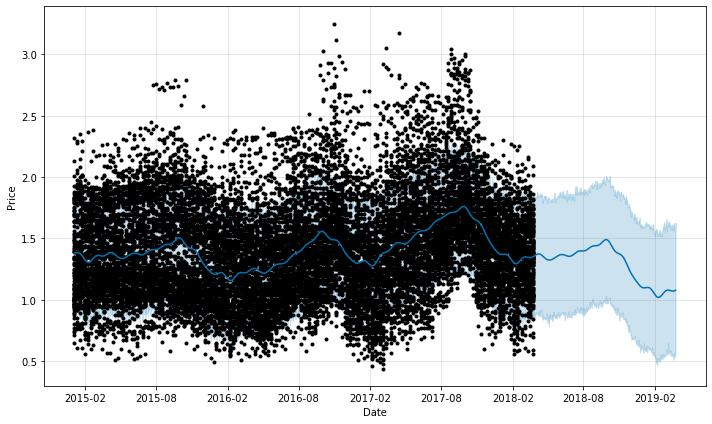

In [29]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

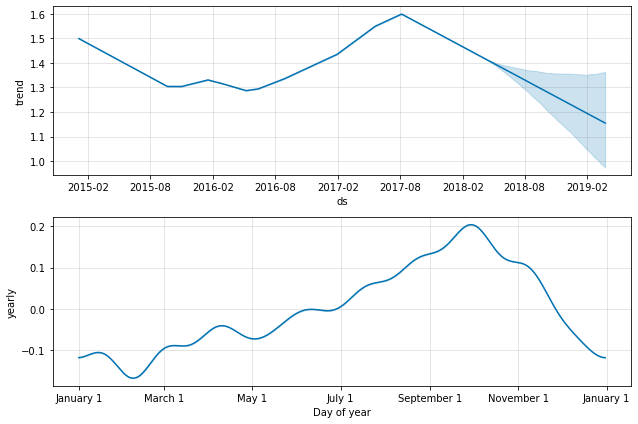

In [30]:
figure3 = m.plot_components(forecast)